In [8]:
import sys
sys.path.append("../")

import os
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from scipy import stats

In [9]:
data_path = '/Users/kylieleblancKylie/domino/dofis/data/'
table_path = '/Users/kylieleblancKylie/domino/dofis/results/impact/'
data = pd.read_csv(os.path.join(data_path, 'clean', 'master_data.csv'),
                  sep=",", low_memory= False)
list(data.columns)

['Unnamed: 0',
 'year',
 'campus',
 'campname',
 'campischarter',
 'district',
 'distname',
 'distischarter',
 'rating_academic',
 'rating_financial',
 'rating_academic_c',
 'type',
 'type_description',
 'cntyname_c',
 'students_amind_num',
 'students_asian_num',
 'students_black_num',
 'students_frpl_num',
 'students_hisp_num',
 'students_num',
 'students_paci_num',
 'students_tworaces_num',
 'students_white_num',
 'teachers_badegree_num',
 'teachers_exp_ave',
 'teachers_msdegree_num',
 'teachers_new_num',
 'teachers_nodegree_num',
 'teachers_num',
 'teachers_phddegree_num',
 'teachers_tenure_ave',
 'alg_avescore',
 'bio_avescore',
 'eng1_avescore',
 'eng2_avescore',
 'm_3rd_avescore',
 'm_4th_avescore',
 'm_5th_avescore',
 'm_6th_avescore',
 'm_7th_avescore',
 'm_8th_avescore',
 'r_3rd_avescore',
 'r_4th_avescore',
 'r_5th_avescore',
 'r_6th_avescore',
 'r_7th_avescore',
 'r_8th_avescore',
 's_8th_avescore',
 'us_avescore',
 'days_max',
 'days_mean',
 'days_min',
 'class_size_1',
 'c

In [10]:
# Achievement

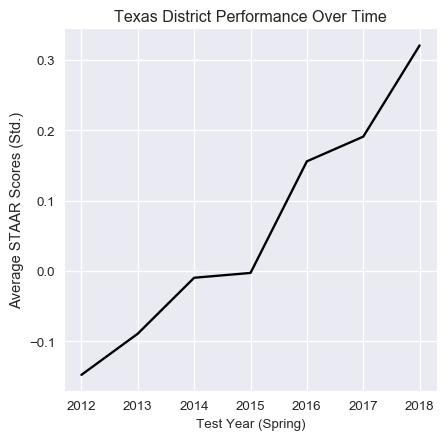

In [11]:
df = pd.DataFrame(data.groupby(['year']).agg({'avescores': 'mean'})).reset_index()

plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df.year, df.avescores, color = 'black')

plt.ylabel('Average STAAR Scores (Std.)')
plt.title('Texas District Performance Over Time')
plt.xlabel('Test Year (Spring)', size = 'medium')


plt.savefig(table_path + 'its.png', dpi = 600, bbox_inches="tight")
plt.show()

# Student-Teacher Ratio

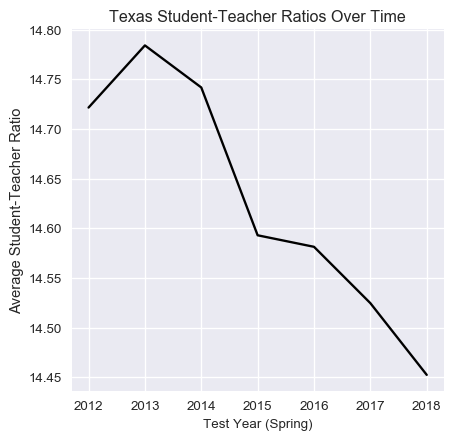

In [12]:
df = pd.DataFrame(data.groupby(['year']).agg({'stu_teach_ratio': 'mean'})).reset_index()

plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df.year, df.stu_teach_ratio, color = 'black')

plt.ylabel('Average Student-Teacher Ratio')
plt.title('Texas Student-Teacher Ratios Over Time')
plt.xlabel('Test Year (Spring)', size = 'medium')


plt.savefig(table_path + 'its.png', dpi = 600, bbox_inches="tight")
plt.show()

# Certification

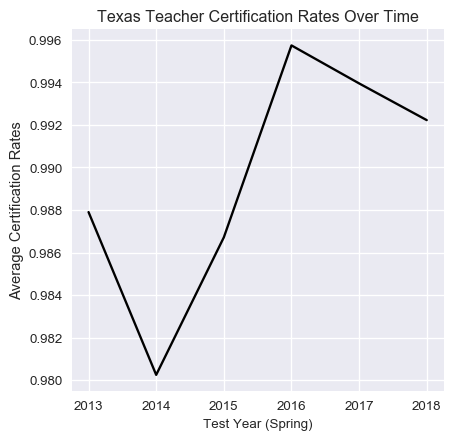

In [14]:
df = pd.DataFrame(data.groupby(['year']).agg({'certification': 'mean'})).reset_index()

plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

# Pre
plt.plot(df.year, df.certification, color = 'black')

plt.ylabel('Average Certification Rates')
plt.title('Texas Teacher Certification Rates Over Time')
plt.xlabel('Test Year (Spring)', size = 'medium')


plt.savefig(table_path + 'its.png', dpi = 600, bbox_inches="tight")
plt.show()

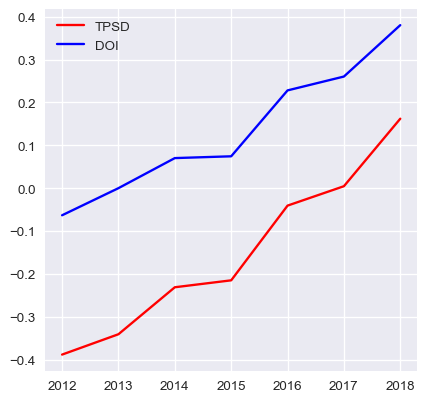

In [32]:
def create_group_df(df):
    new_df = pd.DataFrame(df.groupby(['year']).agg({'avescores': ['mean', 'sem']}))
    new_df = new_df.rename(columns = {'mean': 'score_mean', 'sem': 'score_se'})
    new_df['ub'] = new_df['avescores']['score_mean'] + new_df['avescores']['score_se']
    new_df['lb'] = new_df['avescores']['score_mean'] - new_df['avescores']['score_se']
    return new_df
df_control = create_group_df(data[data.doi == False])
df_treat = create_group_df(data[data.doi == True])
df_treat

plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

plt.plot(df_control.index.values, df_control['avescores']['score_mean'], color = 'red', label = 'TPSD')
plt.plot(df_treat.index.values, df_treat['avescores']['score_mean'], color = 'blue', label = 'DOI')
plt.legend()

plt.show()

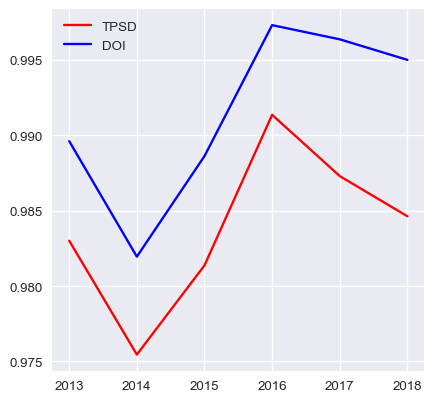

In [34]:
def create_group_df(df):
    new_df = pd.DataFrame(df.groupby(['year']).agg({'certification': ['mean', 'sem']}))
    new_df = new_df.rename(columns = {'mean': 'score_mean', 'sem': 'score_se'})
    new_df['ub'] = new_df['certification']['score_mean'] + new_df['certification']['score_se']
    new_df['lb'] = new_df['certification']['score_mean'] - new_df['certification']['score_se']
    return new_df
df_control = create_group_df(data[data.doi == False])
df_treat = create_group_df(data[data.doi == True])
df_treat

plt.style.use('seaborn')
my_dpi=96
plt.figure(figsize=(480/my_dpi, 480/my_dpi), dpi=my_dpi)

plt.plot(df_control.index.values, df_control['certification']['score_mean'], color = 'red', label = 'TPSD')
plt.plot(df_treat.index.values, df_treat['certification']['score_mean'], color = 'blue', label = 'DOI')
plt.legend()

plt.show()